In [45]:
# %load hangul.py
#!/usr/bin/env python

# In[ ]:


import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', family='Malgun Gothic')  # 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False



In [ ]:
# 시도별 전출입 인구수 데이터 불러오기  pd.read_excel(파일)
# 전출지별 에 누락데이터 처리
# 전출지가 '서울특별시'에서 다른 도시로 전입한 인구수만 추출
# 같은 데이터만 보유하고 있는 전출지별 컬럼을 삭제
# 전입지별 컬럼명을 전입지로 변경
# 전입지를 인덱스로 설정
# 전입지가 경기도인 자료만 추출
# 년도별 전입자 인구수의 변화 를 확인
# 그래프 -> 시각화해서 눈으로 확인 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx')
df.head()
df = df.fillna(method='ffill') # 원 데이터 보존

In [10]:
# 전출지별이 서울특별시인 자료만 검색
mask =( ( df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시'))
df_seoul = df[mask]
df_seoul.head(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891


In [13]:
# 전출지별 컬럼을 삭제
df_seoul = df_seoul.drop('전출지별',axis=1)

In [15]:
df_seoul.head()
# 전입지별의 컬럼명을 전입지로 수정, 전입지를 인덱스로 설정
df_seoul.rename(columns={'전입지별':'전입지'}, inplace=True)
# df_seoul.head()

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [17]:
df_seoul.set_index('전입지', inplace=True)

# 전입지가 경기도인 자료를 추출
df_one = df_seoul.loc['경기도']
print(df_one.head())
df.index
df_one.values

In [41]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [78]:
df_copy = df_seoul.copy()

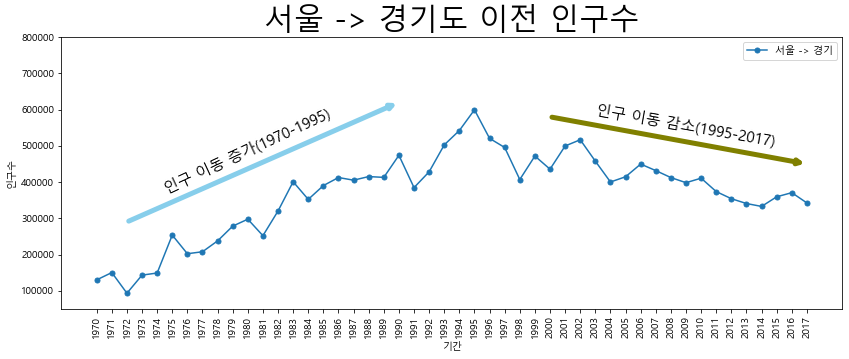

In [75]:
# plt.plot(df_one)   # 인덱스 x축, y축  인구수
plt.figure(figsize=(14,5))
plt.plot(df_one, marker='o', markersize=5)
plt.title('서울 -> 경기도 이전 인구수', size=30) # 제목 설정
plt.xlabel('기간')   # x축 라벨
plt.ylabel('인구수')  # y축 라벨

plt.legend(labels=['서울 -> 경기'], loc='best')
plt.xticks(size=10, rotation='vertical')

plt.ylim(50000, 800000)
# 화살표 정의
plt.annotate('', xy=(20, 620000), xytext=(2,290000), xycoords='data',
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5))
plt.annotate('', xy=(47, 450000), xytext=(30,580000), xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw=5))
# 주석 표시
plt.annotate('인구 이동 증가(1970-1995)', xy=(10, 370000), rotation=25, 
            va='baseline', ha='center', fontsize=15)
plt.annotate('인구 이동 감소(1995-2017)', xy=(39, 500000), rotation=-10, 
            va='baseline', ha='center', fontsize=15)
plt.show()

# 그래프에 관련된 설정은 같은 cell에 있어야 함

C:\Users\cheon\AppData\Local\Temp/ipykernel_3828/682638326.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_one.index, rotation=75)


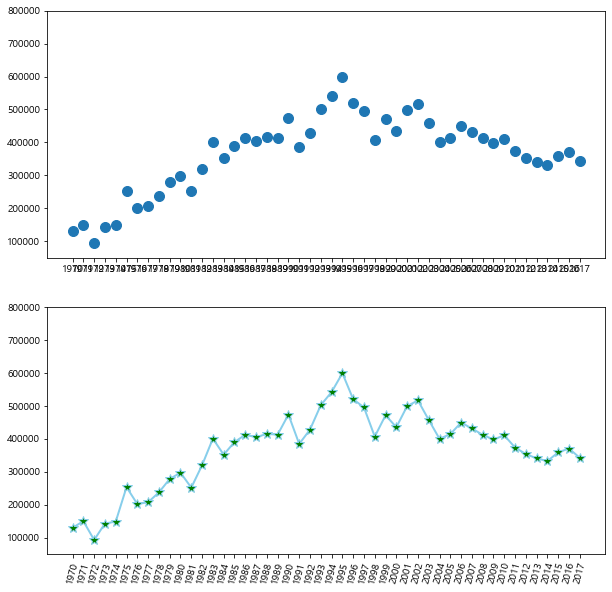

In [92]:
# 한 페이지에 두 개의 그래프를 그림,  두개의 행으로 
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 각 객체에 대한 plot 정의
ax1.plot(df_one, 'o', markersize=10)
ax2.plot(df_one, marker='*', markerfacecolor='green', markersize=10, color='skyblue', linewidth=2,label='서울 -> 경기')
# ax2.legend(loc='best')

# y축 범위설정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# x축 눈금 라벨 지정 75도 회전
ax1.set_xticks(df_one.index)
ax2.set_xticklabels(df_one.index, rotation=75)

plt.show()

In [105]:
# 하나의 페이지에 여러 개의 그래프를 그림

# 서울특별시에서 충청남도, 경상북도, 강원도로 이전한 인구수의 분포도
col_years = list(map(str,range(1980,2016)))  # row 개수와
df_two = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years ]
# df_two.columns
# col_years = list(map(str,range(1970,2018)))
# col_years  # column 명을 리스트로 저장

C:\Users\cheon\AppData\Local\Temp/ipykernel_3828/2171221729.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


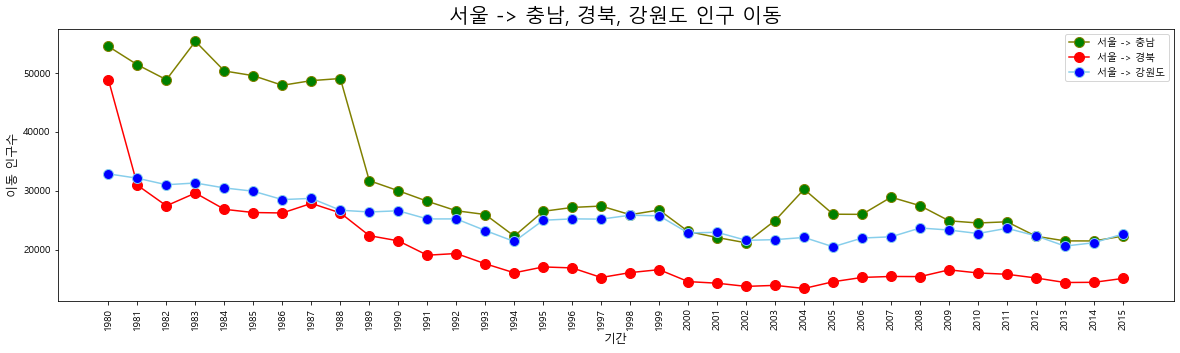

In [107]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# ax 에 그래프를 추가
ax.plot(col_years,  df_two.loc['충청남도', : ],marker='o', markerfacecolor='green',
       markersize=10, color='olive', label='서울 -> 충남')
ax.plot(col_years,  df_two.loc['경상북도', : ],marker='o', markerfacecolor='red',
       markersize=10, color='red', label='서울 -> 경북')
ax.plot(col_years,  df_two.loc['강원도', : ],marker='o', markerfacecolor='blue',
       markersize=10, color='skyblue', label='서울 -> 강원도')
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title("서울 -> 충남, 경북, 강원도 인구 이동", size=20)
# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)
# 축 눈금 라벨 지정 및 90회전
ax.set_xticklabels(col_years, rotation=90)
plt.show()

In [ ]:
# df_two에 전라남도 데이터를 추가 하세요
# col_years = list(map(str,range(1980,2016)))  # row 개수와
df_two.loc['전라남도'] = df_seoul.loc['전라남도', col_years ]

C:\Users\cheon\AppData\Local\Temp/ipykernel_3828/675564524.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)


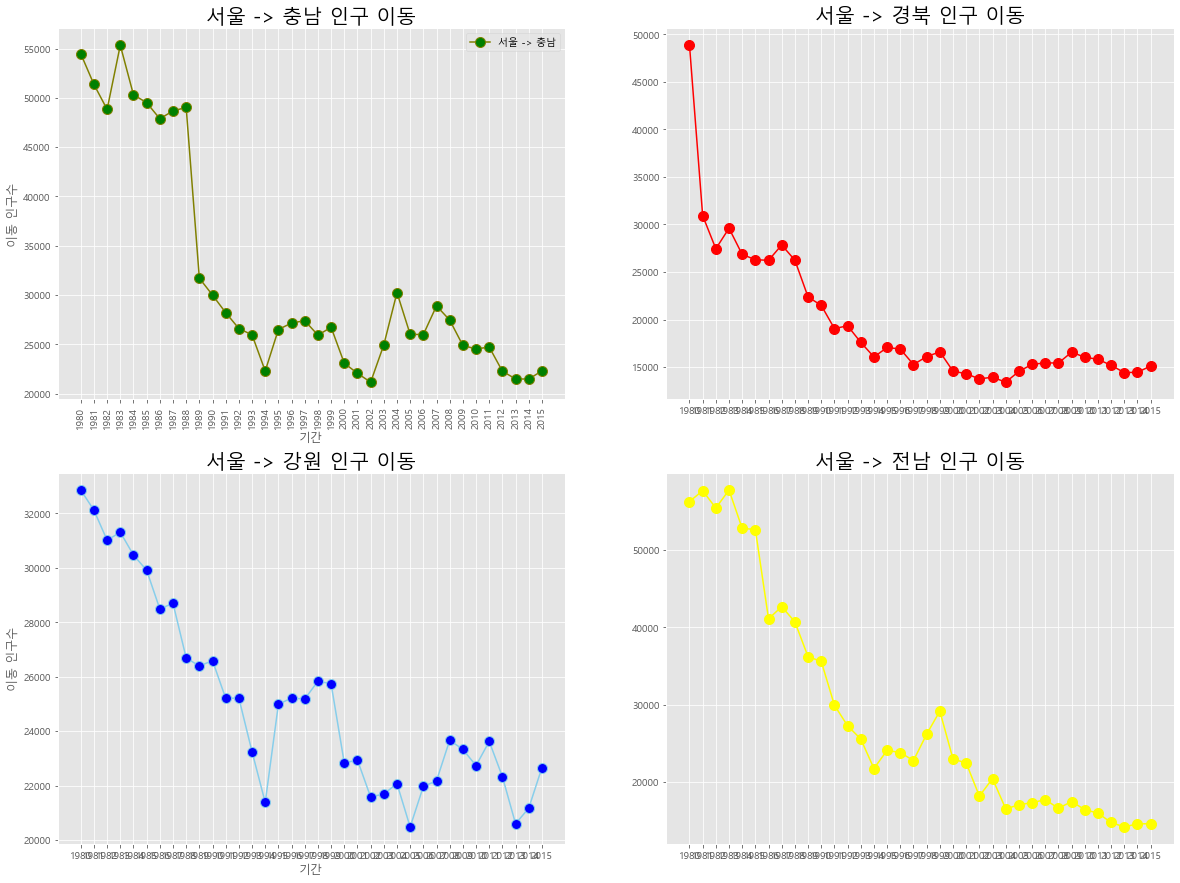

In [115]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,2,1); ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3); ax4 = fig.add_subplot(2,2,4)

# ax 에 그래프를 추가
ax1.plot(col_years,  df_two.loc['충청남도', : ],marker='o', markerfacecolor='green',
       markersize=10, color='olive', label='서울 -> 충남')
ax2.plot(col_years,  df_two.loc['경상북도', : ],marker='o', markerfacecolor='red',
       markersize=10, color='red', label='서울 -> 경북')
ax3.plot(col_years,  df_two.loc['강원도', : ],marker='o', markerfacecolor='blue',
       markersize=10, color='skyblue', label='서울 -> 강원도')
ax4.plot(col_years,  df_two.loc['전라남도', : ],marker='o', markerfacecolor='yellow',
       markersize=10, color='yellow', label='서울 -> 전라남도')
ax1.legend(loc='best')

# 차트 제목 추가
ax1.set_title("서울 -> 충남 인구 이동", size=20); ax2.set_title("서울 -> 경북 인구 이동", size=20)
ax3.set_title("서울 -> 강원 인구 이동", size=20); ax4.set_title("서울 -> 전남 인구 이동", size=20)
# 축 이름 추가
ax1.set_xlabel('기간', size=12); ax1.set_ylabel('이동 인구수', size=12)
ax3.set_xlabel('기간', size=12); ax3.set_ylabel('이동 인구수', size=12)
# 축 눈금 라벨 지정 및 90회전
ax1.set_xticklabels(col_years, rotation=90)
plt.show()

In [130]:
col_years = list(map(str,range(1980,2016)))  # row 개수와
df_two = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years ]
df_two.loc['전라남도'] = df_seoul.loc['전라남도', col_years ]

In [131]:
df_3 = df_two.T   # df_two.transpose()  -> 행과 열의 위치를 바꿈
df_3.index = df_3.index.map(int)  # str -> int 형으로 변경
df_3.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015],
           dtype='int64')

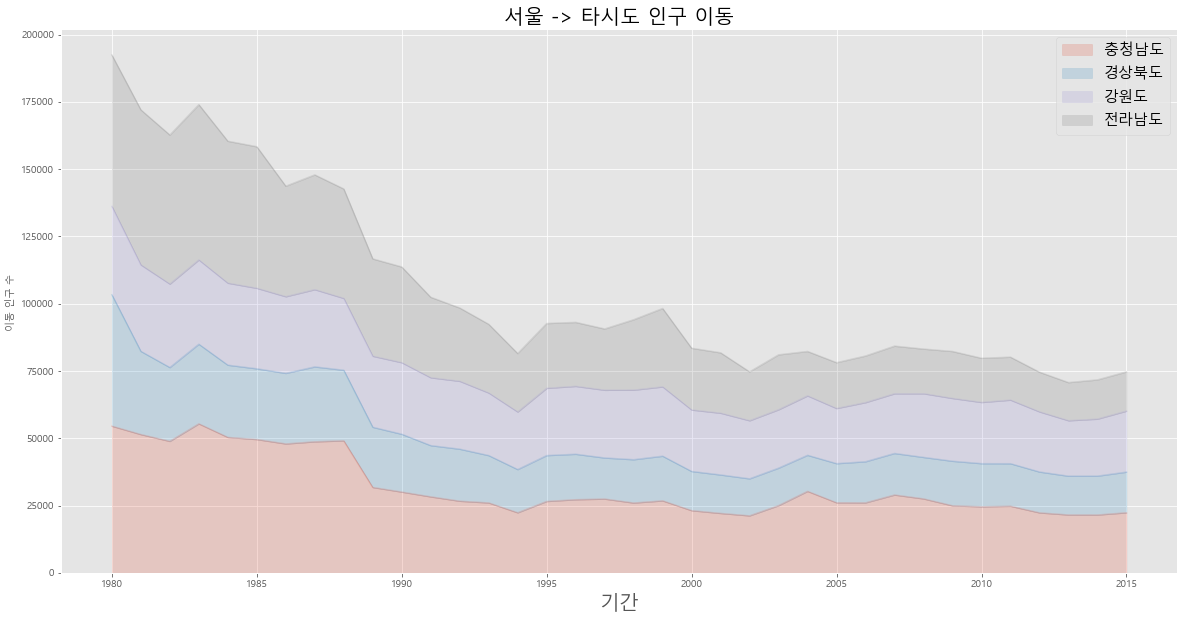

In [125]:
# 면적 그래프 
plt.style.use('ggplot')

df_3.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size=20)
plt.ylabel('이동 인구 수 ', size=10)
plt.xlabel('기간', size=20)
plt.legend(fontsize=15)

plt.show()

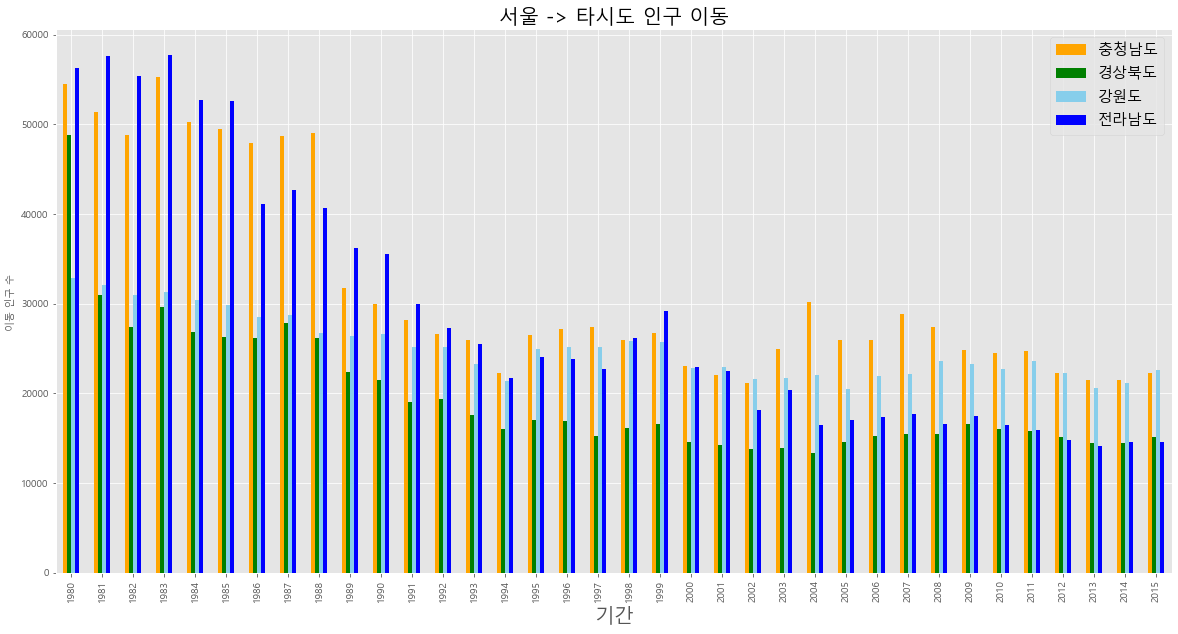

In [133]:
# 막대 그래프 
plt.style.use('ggplot')

df_3.plot(kind='bar', color=['orange','green','skyblue','blue'], figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size=20)
plt.ylabel('이동 인구 수 ', size=10)
plt.xlabel('기간', size=20)
plt.legend(fontsize=15)

plt.show()

In [134]:
# 2010년에서 2017년도 까지의 충청남도, 경상남도, 강원도, 전라남도로 이동한 인구 데이터
col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도', '경상남도', '강원도', '전라남도'], col_years] # df.loc[ 행  ,  열]

In [136]:
# 합계 : 이동 인구수의 합계
df_4['합계'] = df_4.sum(axis=1)
df_4

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상남도,15689,16039,14474,14447,14799,15220,13717,12692,117077.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


In [ ]:
# 수평 막대그래프 , 도시별 인구 이동수의 합계를 그래프로 표현
df_total = df_4[['합계']].sort_values(by='합계')
df_total

Text(0.5, 1.0, '서울 -> 타 도시 인구 이동')

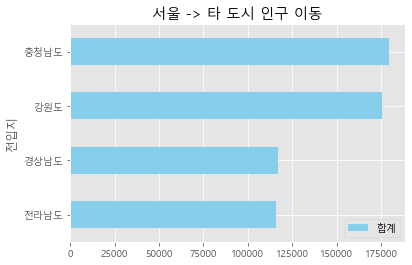

In [141]:
df_total.plot(kind='barh', color='skyblue', width=0.5)
plt.title('서울 -> 타 도시 인구 이동')

In [ ]:
# 남북한 발전전력량 데이터를 가지고 그래프를 생성 twinx()
df = pd.read_excel('./dataset/남북한발전전력량.xlsx')
df.head(10)   #  총 9개의 row가 존재,   북한의 자료만 추출

df_north = df.loc[5:]
print(df_north)  # 전력량(억 ~)  컬럼은 제거
df_north.drop('전력량 (억㎾h)', axis=1, inplace=True)

In [ ]:
df_north.head() # 데이터 확인, '발전전력별' 컬럼을 인덱스로 설정
df_north.set_index('발전 전력별', inplace=True)
df_north   # 컬럼과 인덱스를 위치 바꿈

In [151]:
df_north = df_north.T

In [ ]:
df_north   # 증감율 계산 , 수력, 화력, 합계-> 총발전량, 증감율 컬럼 추가
df_north = df_north.rename(columns={'합계': '총발전량'})
# df_north['증감율']  = ((올해의 총발전량/이전년도의 총발전량)-1) * 100
# df_north['총발전량'].shift(1)
df_north['총발전량 - 1년'] = df_north['총발전량'].shift(1)
df_north['증감율'] = ((df_north['총발전량']/df_north['총발전량 - 1년']) - 1) * 100
df_north

<AxesSubplot:>

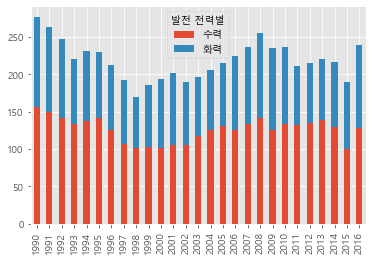

In [161]:
df_north[['수력', '화력']].plot(kind='bar', stacked=True)

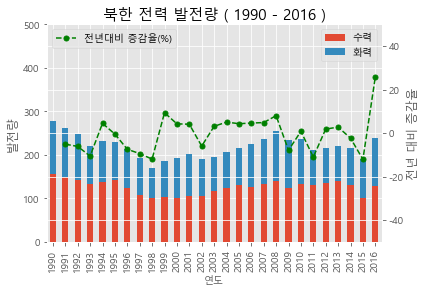

In [172]:
# 2축을 가진 그래프 그리기
ax1 = df_north[['수력', '화력']].plot(kind='bar',stacked=True)
ax2 = ax1.twinx()
ax2.plot(df_north.index , df_north['증감율'], ls='--', marker='o', markersize=5, color='green',
        label='전년대비 증감율(%)')
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=10)
ax1.set_ylabel("발전량")
ax2.set_ylabel('전년 대비 증감율')
plt.title("북한 전력 발전량 ( 1990 - 2016 )", size=15)
ax2.legend(loc='upper left')
ax1.legend(loc='best')

plt.show()

In [174]:
# seaborn 을 활용한 고급 그래프 작성하기
import seaborn  as sns

titanic = sns.load_dataset('titanic')
print(titanic.head())
print()
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-n

In [178]:
# %load hangul.py
#!/usr/bin/env python

# In[ ]:


import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', family='Malgun Gothic')  # 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False



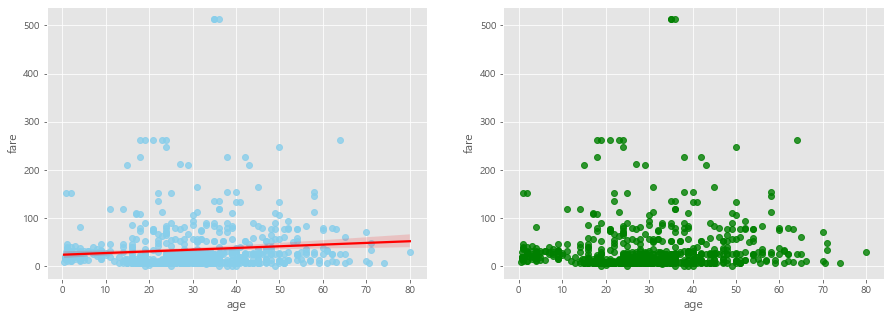

In [184]:
# age, fare 컬럼간의 관계 -> 회귀선 있는, 없는
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)   # 회귀선을 그리기
ax2 = fig.add_subplot(1, 2, 2)   # 회귀선 보이지 않기

#  그래프 그리기 - 선형회귀선 표시 ( fit_reg = True)
sns.regplot(x = 'age', y='fare', data=titanic, ax=ax1, color='skyblue', line_kws={'color':'red'})
#  그래프 그리기 - 선형회귀선 표시 ( fit_reg = False)
sns.regplot(x = 'age', y='fare', data=titanic, ax=ax2, fit_reg=False, color='green')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


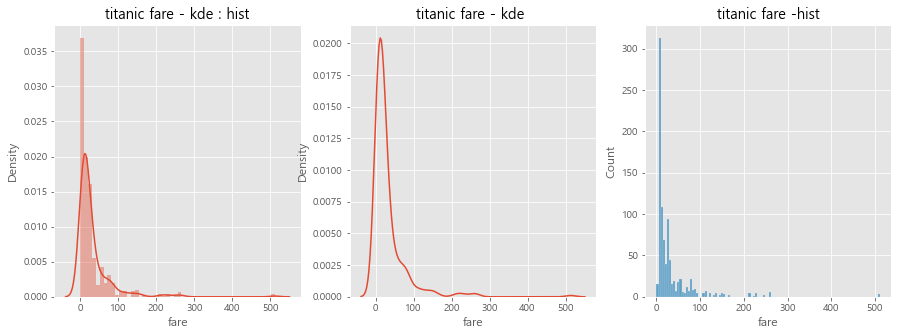

In [199]:
# 커널 밀도 함수 : 데이터가 집중된 분포, hist, kde
fig = plt.figure(figsize=(15,5))  # ( 10, 10 )
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본 값 : hist, kde
sns.distplot(titanic['fare'], ax = ax1)
# hist  : False
# sns.distplot(titanic['fare'], ax=ax2, hist=False)
sns.kdeplot(titanic['fare'], ax = ax2)
# kde  : False
# sns.distplot(titanic['fare'], ax=ax3, kde=False)
sns.histplot(titanic['fare'], ax = ax3)

ax1.set_title('titanic fare - kde : hist')
ax2.set_title('titanic fare - kde ')
ax3.set_title('titanic fare -hist')
plt.show()

<AxesSubplot:xlabel='class', ylabel='sex'>

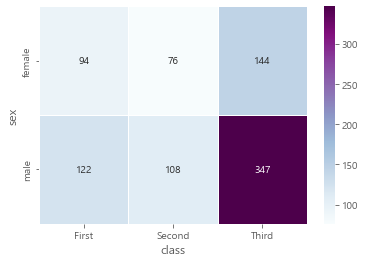

In [205]:
# heatmap : 색깔로 두 변수의 관계성을 보여주는 그래프
table = titanic.pivot_table(index=['sex'], columns = ['class'], aggfunc = 'size')
sns.heatmap( table, annot=True, fmt='d',
           cmap='BuPu',
           linewidth=.5,
           cbar = True)

In [202]:
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


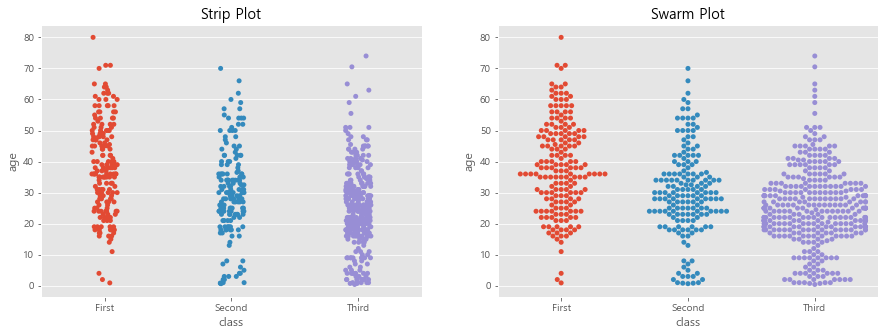

In [209]:
#범주형 데이터의 산점도
titanic['class'].dtype

fig = plt.figure( figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 : 데이터 분산 고려 않음
sns.stripplot(x='class', y='age', data=titanic, ax = ax1)

# 이산형 변수의 분포 : 데이터 분산 고려
sns.swarmplot(x='class', y='age', data=titanic, ax = ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

In [211]:
# !pip install folium  # dos cmd 창에서  명령어 를 실행한 결과와 동일함

In [212]:
# 지도를 활용 : Folium 라이브러리
import folium

In [214]:
#  서울의 지도 만들기
seoul_map = folium.Map( location=[37.55 , 126.98], zoom_start= 12)

# 파일로 저장 
seoul_map.save("./dataset/seoul.html")


In [215]:
# 지도 스타일 적용하기

seoul_map2 = folium.Map( location=[37.55 , 126.98], zoom_start= 12, tiles = 'Stamen Terrain')
seoul_map3 = folium.Map( location=[37.55 , 126.98], zoom_start= 12, tiles = 'Stamen Toner')

# 지도 저장
seoul_map2.save("./dataset/seoul_2.html")
seoul_map3.save("./dataset/seoul_3.html")

In [ ]:
# 지도에 마커 표시하기
# 위도 경도의 자료가 있는 데이터를 load
df = pd.read_excel('./dataset/서울지역 대학교 위치.xlsx', index_col=0)
print(df.head())

seoul_map = folium.Map( location=[37.55 , 126.98], zoom_start= 12, tiles = 'Stamen Terrain')

# df.set_index('Unnamed: 0', inplace=True)
df.head()

In [232]:
df = pd.read_excel('./dataset/서울지역 대학교 위치.xlsx')
df = df.rename(columns = { 'Unnamed: 0' : 'name'})
df.head()

,name,위도,경도
0,KAIST 서울캠퍼스,37.592573,127.046737
1,KC대학교,37.548345,126.854797
2,가톨릭대학교(성신교정),37.585922,127.004328
3,가톨릭대학교(성의교정),37.499623,127.006065
4,감리교신학대학교,37.567645,126.961610


In [231]:
for name, lat, lng in zip(df.name, df.위도, df.경도):
    folium.Marker( [lat, lng] , popup=name ).add_to(seoul_map)
seoul_map.save('./dataset/seoul_c1.html')

In [228]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker( [lat, lng] , popup=name ).add_to(seoul_map)
#     print(name, lat, lng)
seoul_map.save('./dataset/seoul_colleage.html')